In [1]:
"""

rouge score and sbert overlap analysis and also the readability scoresof individual definitions

"""

'\n\nrouge score and sbert overlap analysis and also the readability scoresof individual definitions\n\n'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
df_merge = pd.read_csv("sbert_lay_first_merge.csv")

df_merge.head()

,Unnamed: 0,Unnamed: 0_x,name,concept_id,canonical_name,aliases,types,definition_x,Unnamed: 0_y,ann_text,definition_y,sbert_def
0,0,0,1,None,not_found,not_found,None,not found in UMLS,10545,1,"A tiny amount of something, usually a drug.",not found in UMLS
1,1,0,1,None,not_found,not_found,None,not found in UMLS,16312,1,A stain used in the lab to identify amyloid an...,not found in UMLS
2,2,0,1,None,not_found,not_found,None,not found in UMLS,18791,1,Near the portal vein.,not found in UMLS
3,3,0,1,None,not_found,not_found,None,not found in UMLS,19891,1,A measurement of volume (5 milliliters is abou...,not found in UMLS
4,4,0,1,None,not_found,not_found,None,not found in UMLS,19903,1,The amount of a drug or other treatment given ...,not found in UMLS


In [4]:
df_merge.columns


Index(['Unnamed: 0', 'Unnamed: 0_x', 'name', 'concept_id', 'canonical_name',
       'aliases', 'types', 'definition_x', 'Unnamed: 0_y', 'ann_text',
       'definition_y', 'sbert_def'],
      dtype='object')

In [5]:
df_merge.rename(columns = {'definition_x':'first_def','definition_y':'laydef'},inplace = True)

In [6]:
df = df_merge[df_merge.canonical_name != 'not_found']

In [7]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'name', 'concept_id', 'canonical_name',
       'aliases', 'types', 'first_def', 'Unnamed: 0_y', 'ann_text', 'laydef',
       'sbert_def'],
      dtype='object')

In [8]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0_x       int64
name              object
concept_id        object
canonical_name    object
aliases           object
types             object
first_def         object
Unnamed: 0_y       int64
ann_text          object
laydef            object
sbert_def         object
dtype: object

In [9]:
df = df.applymap(str)

In [10]:
from rouge import Rouge
import textstat

rouge = Rouge()

In [11]:
df['rouge'] = rouge.get_scores(df['laydef'],df['sbert_def'])

In [12]:
# print(df['sbert_def'][0])

In [13]:
# df['sbert_readability'] = ""
# df['lay_readability'] = ""
df['UMLS_readability'] = df['sbert_def'].apply(textstat.flesch_reading_ease)
df['lay_readability'] = df['laydef'].apply(textstat.flesch_reading_ease)

In [14]:
df.head(20)

,Unnamed: 0,Unnamed: 0_x,name,concept_id,canonical_name,aliases,types,first_def,Unnamed: 0_y,ann_text,laydef,sbert_def,rouge,UMLS_readability,lay_readability
28,28,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,2,oral,Taken by mouth.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.33333333333333...",37.98,93.81
29,29,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,1973,oral,Having to do with the mouth.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.25, 'p': 0.333333333333333...",37.98,99.23
30,30,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,19988,oral,A pill.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.5, 'f': 0.1999...",37.98,120.21
31,31,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,25644,oral,"A tiny amount of something, usually a drug.",A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.125, 'f': 0.12...",37.98,80.28
32,32,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,28951,oral,Food and drink.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'r...",37.98,119.19
33,33,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,31308,oral,One thousandth of a gram. Drugs are often meas...,An intended site for a dose form that is for a...,"{'rouge-1': {'r': 0.08333333333333333, 'p': 0....",58.28,82.81
34,34,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,31602,oral,A measurement of volume (5 milliliters is abou...,An intended site for a dose form that is for a...,"{'rouge-1': {'r': 0.08333333333333333, 'p': 0....",58.28,78.25
35,35,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,35598,oral,A highly addictive drug used to relieve severe...,An intended site for a dose form that is for a...,"{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'r...",58.28,68.77
36,36,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,35726,oral,A drug that is very similar to another drug. O...,The introduction of a substance to the mouth o...,"{'rouge-1': {'r': 0.0847457627118644, 'p': 0.3...",41.40,71.31
37,37,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,39521,oral,A drug used to help cough out phlegm. Also kno...,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.08333333333333...",37.98,107.69


In [15]:
print(len(df))

29082


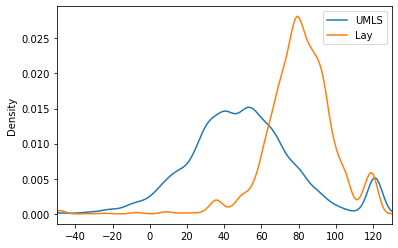

In [21]:
plt.xlim([-50,130])

df["UMLS_readability"].plot(kind = 'kde',label = "UMLS")
df["lay_readability"].plot(kind = 'kde',label = "Lay")
plt.legend()

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/nkantu_umass_edu/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))

In [25]:
df["UMLS_tokenize"] = df["sbert_def"].apply(word_tokenize)
df["lay_tokenize"] = df["laydef"].apply(word_tokenize)

In [26]:
df["UMLS_tokenize"] = df["UMLS_tokenize"].apply(lambda x : [item for item in x if item not in stop_words])
df["lay_tokenize"] = df["lay_tokenize"].apply(lambda x : [item for item in x if item not in stop_words])

In [61]:
df.head(50)

,Unnamed: 0,Unnamed: 0_x,name,concept_id,canonical_name,aliases,types,first_def,Unnamed: 0_y,ann_text,laydef,sbert_def,rouge,UMLS_readability,lay_readability,UMLS_tokenize,lay_tokenize
28,28,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,2,oral,Taken by mouth.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.33333333333333...",37.98,93.81,A substance intended administration mouth .,Taken mouth .
29,29,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,1973,oral,Having to do with the mouth.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.25, 'p': 0.333333333333333...",37.98,99.23,A substance intended administration mouth .,Having mouth .
30,30,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,19988,oral,A pill.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.5, 'f': 0.1999...",37.98,120.21,A substance intended administration mouth .,A pill .
31,31,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,25644,oral,"A tiny amount of something, usually a drug.",A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.125, 'f': 0.12...",37.98,80.28,A substance intended administration mouth .,"A tiny amount something , usually drug ."
32,32,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,28951,oral,Food and drink.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'r...",37.98,119.19,A substance intended administration mouth .,Food drink .
33,33,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,31308,oral,One thousandth of a gram. Drugs are often meas...,An intended site for a dose form that is for a...,"{'rouge-1': {'r': 0.08333333333333333, 'p': 0....",58.28,82.81,An intended site dose form administration swal...,One thousandth gram . Drugs often measured mil...
34,34,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,31602,oral,A measurement of volume (5 milliliters is abou...,An intended site for a dose form that is for a...,"{'rouge-1': {'r': 0.08333333333333333, 'p': 0....",58.28,78.25,An intended site dose form administration swal...,A measurement volume ( 5 milliliters 1 teaspoo...
35,35,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,35598,oral,A highly addictive drug used to relieve severe...,An intended site for a dose form that is for a...,"{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'r...",58.28,68.77,An intended site dose form administration swal...,A highly addictive drug used relieve severe lo...
36,36,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,35726,oral,A drug that is very similar to another drug. O...,The introduction of a substance to the mouth o...,"{'rouge-1': {'r': 0.0847457627118644, 'p': 0.3...",41.40,71.31,The introduction substance mouth gastrointesti...,A drug similar another drug . One drug may sub...
37,37,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,39521,oral,A drug used to help cough out phlegm. Also kno...,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.08333333333333...",37.98,107.69,A substance intended administration mo

In [30]:
df['UMLS_tokenize'] = df['UMLS_tokenize'].apply(' '.join)
df['lay_tokenize'] = df['lay_tokenize'].apply(' '.join)

In [32]:
df.dropna()

,Unnamed: 0,Unnamed: 0_x,name,concept_id,canonical_name,aliases,types,first_def,Unnamed: 0_y,ann_text,laydef,sbert_def,rouge,UMLS_readability,lay_readability,UMLS_tokenize,lay_tokenize
28,28,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,2,oral,Taken by mouth.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.33333333333333...",37.98,93.81,A substance intended administration mouth .,Taken mouth .
29,29,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,1973,oral,Having to do with the mouth.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.25, 'p': 0.333333333333333...",37.98,99.23,A substance intended administration mouth .,Having mouth .
30,30,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,19988,oral,A pill.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.5, 'f': 0.1999...",37.98,120.21,A substance intended administration mouth .,A pill .
31,31,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,25644,oral,"A tiny amount of something, usually a drug.",A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.125, 'f': 0.12...",37.98,80.28,A substance intended administration mouth .,"A tiny amount something , usually drug ."
32,32,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,28951,oral,Food and drink.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'r...",37.98,119.19,A substance intended administration mouth .,Food drink .
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37444,37444,0,con,C4724102,EDQM-HC Container Terminology,"['EDQM-HC Container Terminology', 'Container',...",['T170'],Terminology subset about items of packaging th...,42132,con,A fluid given to help make pictures of the ins...,Terminology subset about items of packaging th...,"{'rouge-1': {'r': 0.0625, 'p': 0.1818181818181...",22.24,83.66,Terminology subset items packaging part medici...,A fluid given help make pictures inside body .
37445,37445,0,clinical laboratory improvements amendments of...,C0205210,Clinical,"['clinical', 'Clinical', 'Clinical (qualifier ...",['T080'],Having to do with the examination and treatmen...,42133,clinical laboratory improvements amendments of...,Rules that apply to all U.S. sites that test h...,Having to do with the examination and treatmen...,"{'rouge-1': {'r': 0.1, 'p': 0.0476190476190476...",52.87,80.28,Having examination treatment patients .,Rules apply U.S. sites test human samples heal...
37446,37446,0,cytopathology,C0243139,science of Cytology and Pathology,"['cytopathology', 'Cytology and Pathology', 'C...",['T090'],A branch of pathology that studies and diagnos...,42134,cytopathology,Looking at cells from different parts of the b...,A branch of pathology that studies and diagnos...,"{'rouge-1': {'r': 0.1111111111111111, 'p': 0.1...",31.21,81.63,A branch pathology studies diagnoses diseases ...,Looking cells different parts body see disease .
37447,37447,0,clia,C0179891,"Analyzers, Laboratory, Immunoassay, Chemilumin...",['chemiluminescent laboratory immunoassay anal...,['T074'],nan,42135,clia,Rules that make laboratory testing better.,A Federal law establishing quality standards f...,"{'rouge-1': {'r': 0.0625, 'p': 0.3333333333333...",-0.94,31.55,A Federal law establishing quality standards l...,Rules make laboratory testing better .


In [62]:
df = df[df.sbert_def != "not found in UMLS"]

In [63]:
r_scores = rouge.get_scores(df['UMLS_tokenize'],df['lay_tokenize'],ignore_empty = True)

In [64]:
print(len(r_scores))

29081


In [65]:
print(r_scores[3]['rouge-l'])

{'r': 0.14285714285714285, 'p': 0.2, 'f': 0.1666666618055557}


In [66]:
arr = []
app = []
for i in range(len(r_scores)):
    arr.append(r_scores[i]['rouge-l']['r'])
    app.append(r_scores[i]['rouge-l']['p'])

(array([13815.,  5136.,  4553.,  1904.,  1035.,  1504.,   417.,   208.,
          166.,   343.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

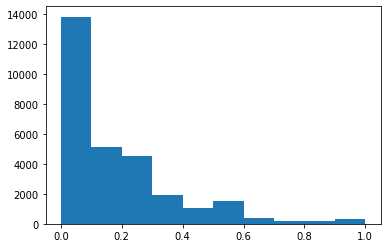

In [67]:
plt.hist(arr)

(array([18713.,  5361.,  2823.,   946.,   421.,   473.,   131.,    54.,
           33.,   126.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

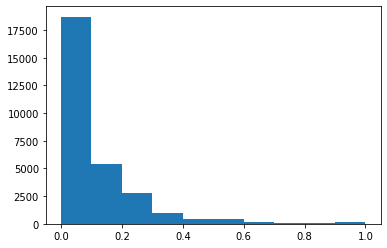

In [68]:
plt.hist(app)

In [72]:
df.head(50)

,Unnamed: 0,Unnamed: 0_x,name,concept_id,canonical_name,aliases,types,first_def,Unnamed: 0_y,ann_text,laydef,sbert_def,rouge,UMLS_readability,lay_readability,UMLS_tokenize,lay_tokenize
28,28,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,2,oral,Taken by mouth.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.33333333333333...",37.98,93.81,A substance intended administration mouth .,Taken mouth .
29,29,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,1973,oral,Having to do with the mouth.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.25, 'p': 0.333333333333333...",37.98,99.23,A substance intended administration mouth .,Having mouth .
30,30,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,19988,oral,A pill.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.5, 'f': 0.1999...",37.98,120.21,A substance intended administration mouth .,A pill .
31,31,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,25644,oral,"A tiny amount of something, usually a drug.",A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.125, 'f': 0.12...",37.98,80.28,A substance intended administration mouth .,"A tiny amount something , usually drug ."
32,32,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,28951,oral,Food and drink.,A substance intended for administration throug...,"{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'r...",37.98,119.19,A substance intended administration mouth .,Food drink .
33,33,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,31308,oral,One thousandth of a gram. Drugs are often meas...,An intended site for a dose form that is for a...,"{'rouge-1': {'r': 0.08333333333333333, 'p': 0....",58.28,82.81,An intended site dose form administration swal...,One thousandth gram . Drugs often measured mil...
34,34,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,31602,oral,A measurement of volume (5 milliliters is abou...,An intended site for a dose form that is for a...,"{'rouge-1': {'r': 0.08333333333333333, 'p': 0....",58.28,78.25,An intended site dose form administration swal...,A measurement volume ( 5 milliliters 1 teaspoo...
35,35,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,35598,oral,A highly addictive drug used to relieve severe...,An intended site for a dose form that is for a...,"{'rouge-1': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'r...",58.28,68.77,An intended site dose form administration swal...,A highly addictive drug used relieve severe lo...
36,36,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,35726,oral,A drug that is very similar to another drug. O...,The introduction of a substance to the mouth o...,"{'rouge-1': {'r': 0.0847457627118644, 'p': 0.3...",41.40,71.31,The introduction substance mouth gastrointesti...,A drug similar another drug . One drug may sub...
37,37,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...,39521,oral,A drug used to help cough out phlegm. Also kno...,A substance intended for administration throug...,"{'rouge-1': {'r': 0.125, 'p': 0.08333333333333...",37.98,107.69,A substance intended administration mo

In [73]:
df.to_csv("rouge_check.csv")

In [15]:
"""
The original file

"""

df = pd.read_csv('annotations_20220816.tsv',delimiter = '\t', on_bad_lines='skip')

df.head()
print(len(df))

348007


/scratch/ials-gpu017/4512360/ipykernel_1150010/1439648700.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('annotations_20220816.tsv',delimiter = '\t', on_bad_lines='skip')


In [16]:
"""
file with def of jargon terms taking the first def among all available using the whole sentence

"""

df = pd.read_csv('df_annotations.csv')

df.head(20)

,Unnamed: 0,row_num,sentence,jargon_term,definition
0,0,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,MG,One of the Indian Ocean Islands off the southe...
1,1,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,Oral,A tablet intended for oral administration.
2,2,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,Tablet,A tablet intended for oral administration.
3,3,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,Vitamin,A member of the vitamin B family that stimulat...
4,4,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,B,A member of the vitamin B family that stimulat...
5,5,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,complex,A member of the vitamin B family that stimulat...
6,6,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,folic,A member of the vitamin B family that stimulat...
7,7,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,acid,A member of the vitamin B family that stimulat...
8,8,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,vitamin,A six carbon compound related to glucose. It i...
9,9,0,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,c,A six carbon compound related to glucose. It i...


In [17]:
"""
The def of all jargon terms with all available defs from UMLS

"""

df = pd.read_csv('df_annotations_all_definitions.csv')

df.head(20)

,Unnamed: 0,name,concept_id,canonical_name,aliases,types,definition
0,0,1,None,not_found,not_found,None,not found in UMLS
1,0,mg,None,not_found,not_found,None,not found in UMLS
2,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...
3,1,oral,C0442027,Oral,"['Oral', 'Orally', 'PO - Oral', 'oral', 'Oral ...",['T082'],"Of, or relating to, or affecting, or for use i..."
4,2,oral,C1272919,Oral Dosage Form,"['Oral', 'Oral Dosage Form', 'oral dosage form...",['T122'],A substance intended for administration throug...
5,3,oral,C1527415,Oral Route of Drug administration,"['by mouth', 'PO - Per os', 'Oral Route of Adm...",['T169'],The introduction of a substance to the mouth o...
6,4,oral,C4521986,Oral (intended site),"['Oral', 'Oral (intended site)']",['T033'],An intended site for a dose form that is for a...
7,0,tablet,C0039225,Tablet Dosage Form,"['TAB', 'tab', 'TabletDrugForm', 'medicines ta...",['T122'],"Solid dosage forms, of varying weight, size, a..."
8,1,tablet,C1705223,Tablet Dosing Unit,"['Tablet Dosing Unit', '{Tablet}', 'Tablet', '...",['T081'],A dosing unit equal to the amount of active in...
9,2,tablet,C4319774,Tablet (unit of presentation),"['Tablet', 'Tablet (unit of presentation)']",['T081'],NaN


In [18]:
"""
Same stuff as before but now with unique words instead of repetitions of jargon terms

"""

df = pd.read_csv('df_annotations_all_definitions_unique.csv')

df.head(20)

,Unnamed: 0,name,concept_id,canonical_name,aliases,types,definition
0,0,1,None,not_found,not_found,None,not found in UMLS
1,0,mg,None,not_found,not_found,None,not found in UMLS
2,0,oral,C0226896,Oral cavity,"['Oral', 'Buccal Cavity', 'Buccal cavity', 'Or...",['T030'],The oval-shaped oral cavity located at the ape...
3,1,oral,C0442027,Oral,"['Oral', 'Orally', 'PO - Oral', 'oral', 'Oral ...",['T082'],"Of, or relating to, or affecting, or for use i..."
4,2,oral,C1272919,Oral Dosage Form,"['Oral', 'Oral Dosage Form', 'oral dosage form...",['T122'],A substance intended for administration throug...
5,3,oral,C1527415,Oral Route of Drug administration,"['by mouth', 'PO - Per os', 'Oral Route of Adm...",['T169'],The introduction of a substance to the mouth o...
6,4,oral,C4521986,Oral (intended site),"['Oral', 'Oral (intended site)']",['T033'],An intended site for a dose form that is for a...
7,0,tablet,C0039225,Tablet Dosage Form,"['TAB', 'tab', 'TabletDrugForm', 'medicines ta...",['T122'],"Solid dosage forms, of varying weight, size, a..."
8,1,tablet,C1705223,Tablet Dosing Unit,"['Tablet Dosing Unit', '{Tablet}', 'Tablet', '...",['T081'],A dosing unit equal to the amount of active in...
9,2,tablet,C4319774,Tablet (unit of presentation),"['Tablet', 'Tablet (unit of presentation)']",['T081'],NaN


In [19]:
"""
Split and find the jargon term in case of a multi-word jargon all available definitions unique
"""

df = pd.read_csv('multi_split_all_definitions_unique.csv')

df.head(20)

,Unnamed: 0,concept_id,canonical_name,aliases,types,definition,name
0,0,None,not_found,not_found,None,not found in UMLS,virt
1,0,None,not_found,not_found,None,not found in UMLS,-
2,0,None,not_found,not_found,None,not found in UMLS,vite
3,0,C0042890,Vitamins,"['Vitamin preparation, NOS', 'VITAMINS: MISCEL...","['T109', 'T121', 'T127']",Organic substances that are required in small ...,vitamin
4,1,C2349136,Vitamin C Vitamins,['Vitamin C'],"['T109', 'T127']",A nutrient that the body needs in small amount...,vitamin
5,2,C0035527,riboflavin,"['vitamin G', 'Riboflavin (substance)', 'Lacto...","['T109', 'T121', 'T127']","Nutritional factor found in milk, eggs, malted...",vitamin
6,3,C0042839,vitamin A,"['VITAMIN A', 'VITAMIN A PREPARATIONS', 'Retin...","['T109', 'T121', 'T127']",Retinol and derivatives of retinol that play a...,vitamin
7,4,C0087161,all-trans-retinol,"['Vitamin A Alcohol', '3,7-dimethyl-9-(2,6, 6-...","['T109', 'T121', 'T127']",A nutrient that the body needs in small amount...,vitamin
8,0,None,not_found,not_found,None,not found in UMLS,b
9,0,C0439855,Complex,"['complex', 'Complex', 'Complex (qualifier val...",['T080'],"Hard, involved or complicated, elaborate, havi...",complex


In [20]:
"""
Sbert pickded def and first def of all the jargon terms
"""


df = pd.read_csv('sbert_lay_first_merge.csv')

df.head(20)

,Unnamed: 0,Unnamed: 0_x,name,concept_id,canonical_name,aliases,types,definition_x,Unnamed: 0_y,ann_text,definition_y,sbert_def
0,0,0,1,None,not_found,not_found,None,not found in UMLS,10545,1,"A tiny amount of something, usually a drug.",not found in UMLS
1,1,0,1,None,not_found,not_found,None,not found in UMLS,16312,1,A stain used in the lab to identify amyloid an...,not found in UMLS
2,2,0,1,None,not_found,not_found,None,not found in UMLS,18791,1,Near the portal vein.,not found in UMLS
3,3,0,1,None,not_found,not_found,None,not found in UMLS,19891,1,A measurement of volume (5 milliliters is abou...,not found in UMLS
4,4,0,1,None,not_found,not_found,None,not found in UMLS,19903,1,The amount of a drug or other treatment given ...,not found in UMLS
5,5,0,1,None,not_found,not_found,None,not found in UMLS,20323,1,A measure of the amount of something. Transfus...,not found in UMLS
6,6,0,1,None,not_found,not_found,None,not found in UMLS,20583,1,The disease or condition that explains a perso...,not found in UMLS
7,7,0,1,None,not_found,not_found,None,not found in UMLS,23496,1,A type of cell in the blood involved in allerg...,not found in UMLS
8,8,0,1,None,not_found,not_found,None,not found in UMLS,24265,1,An expandable device used to open blocked arte...,not found in UMLS
9,9,0,1,None,not_found,not_found,None,not found in UMLS,24319,1,One thousandth of a gram. Drugs are often meas...,not found in UMLS


In [21]:
"""
Top Sbert def for all jargon terms
"""


df_sbert = pd.read_csv('sentence_bert_top_definitions.csv')
print(len(df_sbert))
df_sbert.head(20)

42137


,Unnamed: 0,ann_text,definition,sbert_def
0,0,virt - vite,"A mix of vitamins. It provides vitamin B-6, vi...",NaN
1,1,mg,"A tiny amount of something, usually a drug.",not found in UMLS
2,2,oral,Taken by mouth.,A substance intended for administration throug...
3,3,tablet,A pill.,A tablet intended for oral administration.
4,4,vitamin b complex,A group of vitamins and nutrients. The body n...,"A group of water-soluble vitamins, some of whi..."
5,5,folic acid,A B vitamin.,A member of the vitamin B family that stimulat...
6,6,vitamin c,A nutrient needed by the body to form and main...,A nutrient that the body needs in small amount...
7,7,tab,A pill.,A tablet intended for oral administration.
8,8,po,By mouth.,not found in UMLS
9,9,qd,Every day.,Occurring or done each day.


In [22]:
"""
All the jargon terms
"""

df = pd.read_csv('unique_terms.csv')

df.head(20)

,Unnamed: 0,ann_text
0,0,Virt - Vite
1,1,1
2,2,MG
3,3,Oral
4,4,Tablet
5,5,Vitamin B complex
6,6,folic acid
7,7,vitamin c
8,8,tab
9,9,po


In [23]:
"""
ALL the jargon terms split
"""

df = pd.read_csv('word_split.csv')

df.head(20)

,Unnamed: 0,Term
0,0,virt
1,1,-
2,2,vite
3,3,1
4,4,mg
5,5,oral
6,6,tablet
7,7,vitamin
8,8,b
9,9,complex


In [24]:
"""
The original file

"""

df = pd.read_csv('annotations_20220816.tsv',delimiter = '\t', on_bad_lines='skip')

df.head()

/scratch/ials-gpu017/4512360/ipykernel_1150010/1001501709.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('annotations_20220816.tsv',delimiter = '\t', on_bad_lines='skip')


,id,text_to_annotate,start,end,ann_text,definition
0,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,0.0,3.0,Virt - Vite,"A mix of vitamins. It provides vitamin B-6, vi..."
1,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,7.0,8.0,1,{DO NOT DEFINE}
2,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,8.0,9.0,MG,"A tiny amount of something, usually a drug."
3,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,9.0,10.0,Oral,Taken by mouth.
4,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,10.0,11.0,Tablet,A pill.


In [25]:
df_lower = df.copy()
df_lower['ann_text_lower'] = df['ann_text'].str.lower()

In [26]:
print(len(df_lower))
df_lower.head(5)


348007


,id,text_to_annotate,start,end,ann_text,definition,ann_text_lower
0,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,0.0,3.0,Virt - Vite,"A mix of vitamins. It provides vitamin B-6, vi...",virt - vite
1,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,7.0,8.0,1,{DO NOT DEFINE},1
2,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,8.0,9.0,MG,"A tiny amount of something, usually a drug.",mg
3,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,9.0,10.0,Oral,Taken by mouth.,oral
4,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,10.0,11.0,Tablet,A pill.,tablet


In [27]:
#experiments

asa = df_lower[['ann_text_lower']]
asa.drop_duplicates()

,ann_text_lower
0,virt - vite
1,1
2,mg
3,oral
4,tablet
...,...
347956,con
347966,clinical laboratory improvements amendments of...
347981,cytopathology
348000,clia


In [28]:
# merge on ann_text and def
df_merged = pd.merge(df_lower,df_sbert[['ann_text','sbert_def','definition']],left_on = ['ann_text_lower','definition'],right_on = ['ann_text','definition'])

In [29]:
df_merged.head(50)

,id,text_to_annotate,start,end,ann_text_x,definition,ann_text_lower,ann_text_y,sbert_def
0,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,0.0,3.0,Virt - Vite,"A mix of vitamins. It provides vitamin B-6, vi...",virt - vite,virt - vite,NaN
1,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,8.0,9.0,MG,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS
2,98580425,Treatment Received : ondansetron HCl oral 2 mg...,7.0,8.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS
3,98580425,Treatment Received : ondansetron HCl oral 2 mg...,44.0,45.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS
4,98580425,Treatment Received : ondansetron HCl oral 2 mg...,61.0,62.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS
5,98580425,Treatment Received : ondansetron HCl oral 2 mg...,100.0,101.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS
6,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",5.0,6.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS
7,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",10.0,11.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS
8,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",16.0,17.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS
9,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",22.0,23.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS


In [30]:
print(len(df_merged))

312163


In [31]:
len(df_merged[df_merged['sbert_def'] == 'not found in UMLS'])

55246

In [32]:
df_split = pd.read_csv('multi_split_all_definitions_unique.csv')

df_split.head(20)

,Unnamed: 0,concept_id,canonical_name,aliases,types,definition,name
0,0,None,not_found,not_found,None,not found in UMLS,virt
1,0,None,not_found,not_found,None,not found in UMLS,-
2,0,None,not_found,not_found,None,not found in UMLS,vite
3,0,C0042890,Vitamins,"['Vitamin preparation, NOS', 'VITAMINS: MISCEL...","['T109', 'T121', 'T127']",Organic substances that are required in small ...,vitamin
4,1,C2349136,Vitamin C Vitamins,['Vitamin C'],"['T109', 'T127']",A nutrient that the body needs in small amount...,vitamin
5,2,C0035527,riboflavin,"['vitamin G', 'Riboflavin (substance)', 'Lacto...","['T109', 'T121', 'T127']","Nutritional factor found in milk, eggs, malted...",vitamin
6,3,C0042839,vitamin A,"['VITAMIN A', 'VITAMIN A PREPARATIONS', 'Retin...","['T109', 'T121', 'T127']",Retinol and derivatives of retinol that play a...,vitamin
7,4,C0087161,all-trans-retinol,"['Vitamin A Alcohol', '3,7-dimethyl-9-(2,6, 6-...","['T109', 'T121', 'T127']",A nutrient that the body needs in small amount...,vitamin
8,0,None,not_found,not_found,None,not found in UMLS,b
9,0,C0439855,Complex,"['complex', 'Complex', 'Complex (qualifier val...",['T080'],"Hard, involved or complicated, elaborate, havi...",complex


In [33]:
df_split = df_split.drop_duplicates(subset = ['name'])

In [34]:
df_term = df[['ann_text']]

df_term['ann_text'] = df_term['ann_text'].astype(str)
df_term['ann_text'] = df_term['ann_text'].str.lower()
df_term['split_list'] = df_term['ann_text'].str.split()


df_term.head()

/scratch/ials-gpu017/4512360/ipykernel_1150010/98316492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_term['ann_text'] = df_term['ann_text'].astype(str)
/scratch/ials-gpu017/4512360/ipykernel_1150010/98316492.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_term['ann_text'] = df_term['ann_text'].str.lower()
/scratch/ials-gpu017/4512360/ipykernel_1150010/98316492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,ann_text,split_list
0,virt - vite,"[virt, -, vite]"
1,1,[1]
2,mg,[mg]
3,oral,[oral]
4,tablet,[tablet]


In [35]:
def fxn(x):
    vec = []
    for i in x:
#         print(type(df_split.loc[df_split['name'] == i,'definition']))
        ssss = df_split.loc[df_split['name'] == i,'definition']
        if(len(ssss)) > 0:
            vec.append(ssss.iloc[0])
    return vec

In [36]:
df_term['split_def'] = df_term['split_list'].apply(fxn)

/scratch/ials-gpu017/4512360/ipykernel_1150010/4073723055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_term['split_def'] = df_term['split_list'].apply(fxn)


In [37]:
df_term.head(30)

,ann_text,split_list,split_def
0,virt - vite,"[virt, -, vite]","[not found in UMLS, not found in UMLS, not fou..."
1,1,[1],[not found in UMLS]
2,mg,[mg],[not found in UMLS]
3,oral,[oral],[The oval-shaped oral cavity located at the ap...
4,tablet,[tablet],"[Solid dosage forms, of varying weight, size, ..."
5,vitamin b complex,"[vitamin, b, complex]",[Organic substances that are required in small...
6,folic acid,"[folic, acid]",[A member of the vitamin B family that stimula...
7,vitamin c,"[vitamin, c]",[Organic substances that are required in small...
8,1,[1],[not found in UMLS]
9,tab,[tab],"[Solid dosage forms, of varying weight, size, ..."


In [38]:
df_term = df_term.drop_duplicates(['ann_text'])

In [39]:
df_fm = pd.merge(df_merged,df_term,left_on = ['ann_text_lower'],right_on = ['ann_text'])

In [40]:
df_fm.head(30)

,id,text_to_annotate,start,end,ann_text_x,definition,ann_text_lower,ann_text_y,sbert_def,ann_text,split_list,split_def
0,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,0.0,3.0,Virt - Vite,"A mix of vitamins. It provides vitamin B-6, vi...",virt - vite,virt - vite,NaN,virt - vite,"[virt, -, vite]","[not found in UMLS, not found in UMLS, not fou..."
1,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,8.0,9.0,MG,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
2,98580425,Treatment Received : ondansetron HCl oral 2 mg...,7.0,8.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
3,98580425,Treatment Received : ondansetron HCl oral 2 mg...,44.0,45.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
4,98580425,Treatment Received : ondansetron HCl oral 2 mg...,61.0,62.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
5,98580425,Treatment Received : ondansetron HCl oral 2 mg...,100.0,101.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
6,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",5.0,6.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
7,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",10.0,11.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
8,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",16.0,17.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
9,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",22.0,23.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]


In [41]:
print(len(df_term))
print(len(df_merged))

33129
312163


In [42]:
df_fm.head(30)

,id,text_to_annotate,start,end,ann_text_x,definition,ann_text_lower,ann_text_y,sbert_def,ann_text,split_list,split_def
0,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,0.0,3.0,Virt - Vite,"A mix of vitamins. It provides vitamin B-6, vi...",virt - vite,virt - vite,NaN,virt - vite,"[virt, -, vite]","[not found in UMLS, not found in UMLS, not fou..."
1,98791999,Virt - Vite 2.5 - 25 - 1 MG Oral Tablet Vitami...,8.0,9.0,MG,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
2,98580425,Treatment Received : ondansetron HCl oral 2 mg...,7.0,8.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
3,98580425,Treatment Received : ondansetron HCl oral 2 mg...,44.0,45.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
4,98580425,Treatment Received : ondansetron HCl oral 2 mg...,61.0,62.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
5,98580425,Treatment Received : ondansetron HCl oral 2 mg...,100.0,101.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
6,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",5.0,6.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
7,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",10.0,11.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
8,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",16.0,17.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]
9,97213602,"p.r.n . , aspirin 81 mg daily , alovudine 150 ...",22.0,23.0,mg,"A tiny amount of something, usually a drug.",mg,mg,not found in UMLS,mg,[mg],[not found in UMLS]


In [44]:
df_fm.to_pickle("final_pickle.pkl")

In [ ]:
df_fm["split_ann_text"] = df_fm["text_to_annotate"].str.split()

In [ ]:
df_fm["n_context"] = ''.join(df_fm["split_ann_text"][max(0,j_start-n):min(len(df_fm["split_ann_text"]),end+n)])

In [34]:
def n_words(df,n):
    df["n_context"] = ""
    df["split"] = df["ann_text"].str.split()
    for i in range(len(df)):
        ss = df["start"].iloc[i]
        ee = df["end"].iloc[i]
        ll = len(df["split"].iloc[i])
        df["n_context"].iloc[i] = ' '.join(df["split"].iloc[i][max(0,ss-n):min(ll,ee+n)])
    df.drop(columns = ["split"],inplace = True)
    
    return df

,ann_text,jargon,start,end
0,monkeys like bananas as they have a lot of pot...,bananas,2,3
1,dogs like meat and like to take a walk in the ...,walk,8,9
2,cats like to play with a cotton ball and sleep...,cotton ball,6,8


In [32]:
# df_new = n_words(example,2)

# df_new.head()

In [23]:
# example["split"] = example["ann_text"].str.split()
# example.head()

In [24]:
# example["n_context"] = ""
# for i in range(len(example)):
#     ss = example["start"].iloc[i]
#     ee = example["end"].iloc[i]
#     ll = len(example["split"].iloc[i])
#     example["n_context"].iloc[i] = ' '.join(example["split"].iloc[i][max(0,ss-0):min(ll,ee+0)])

# example.head()

In [25]:
# example.drop(columns = ["split"],inplace = True)

In [26]:
# example.head()